In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Monthly Order Count


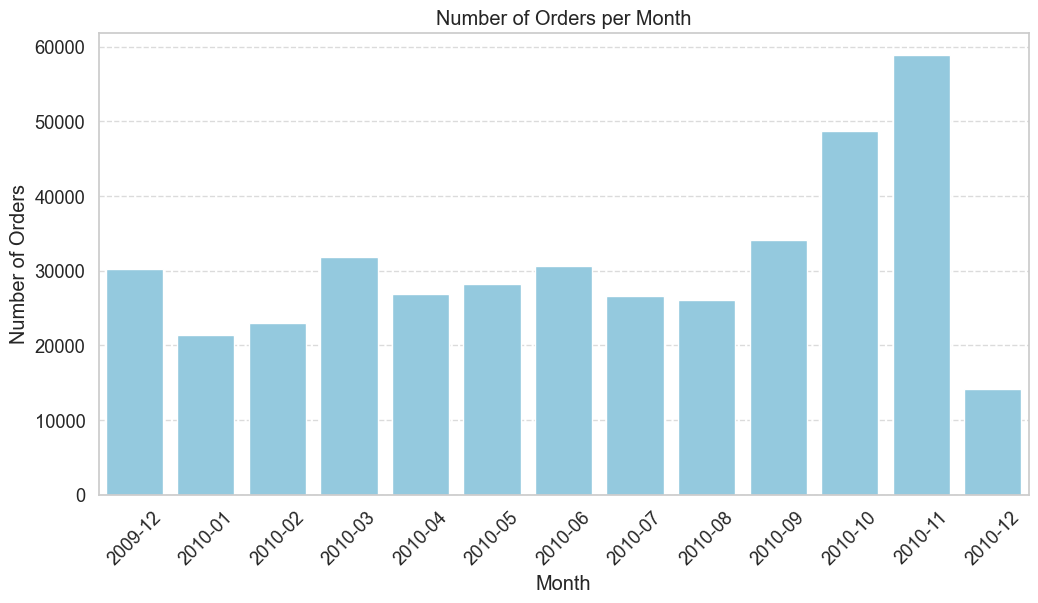

In [35]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
orders_per_month = df.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=orders_per_month.index.astype(str), y=orders_per_month.values, color='skyblue')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Top 10 Selling Products

C:\Users\Asus\AppData\Local\Temp\ipykernel_16448\915684430.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




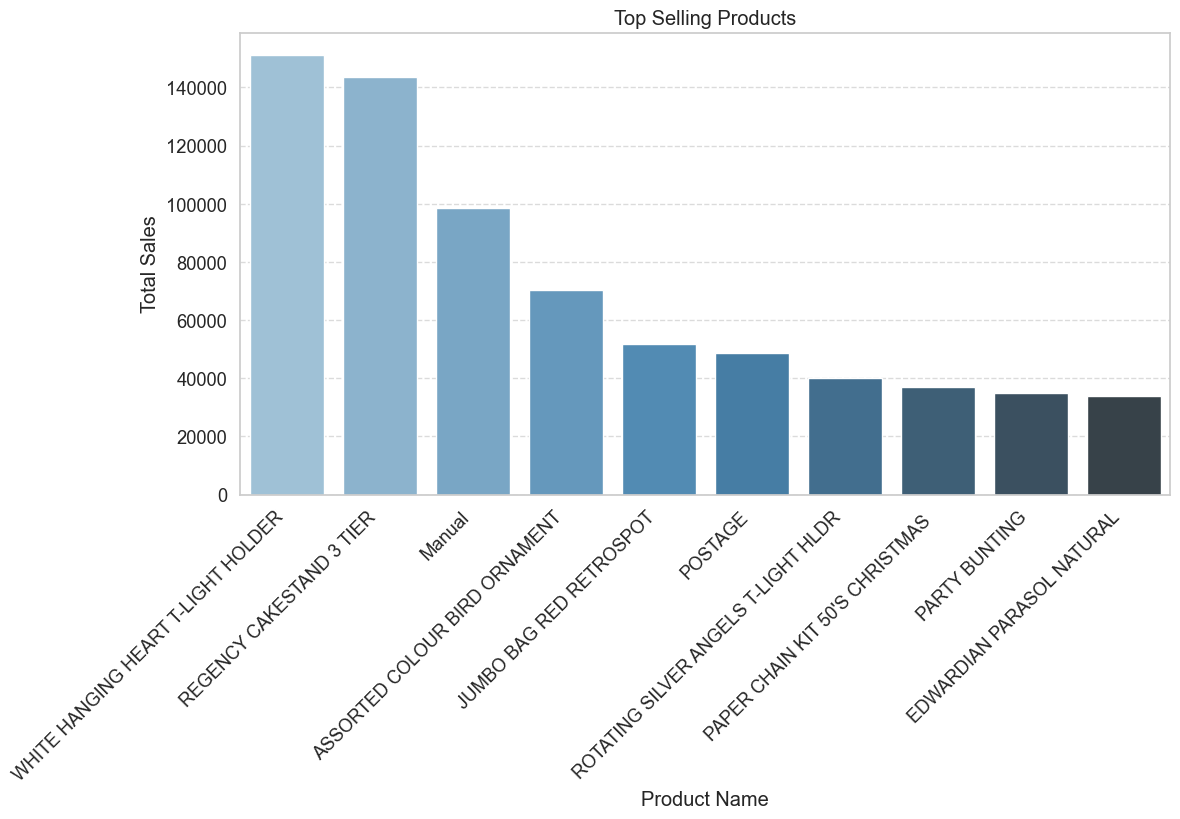

In [36]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
product_sales = df.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='Blues_d')
plt.title('Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Average Unit Price per Country

C:\Users\Asus\AppData\Local\Temp\ipykernel_16448\870674529.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




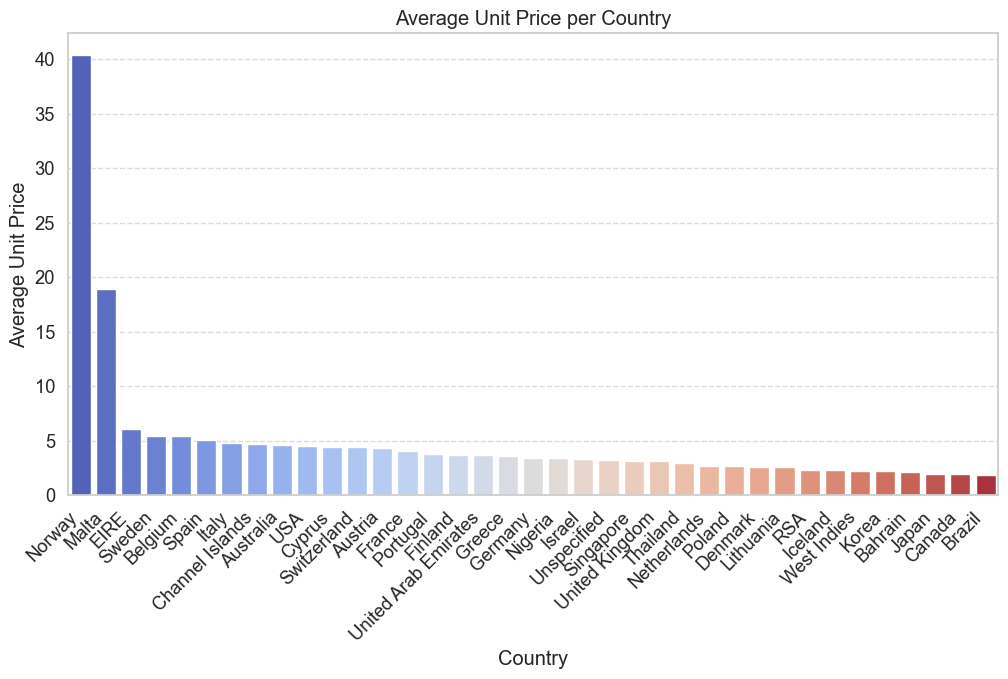

In [37]:

avg_price_per_country = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_country.index, y=avg_price_per_country.values, palette='coolwarm')
plt.title('Average Unit Price per Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Distribution of Sales by Hour

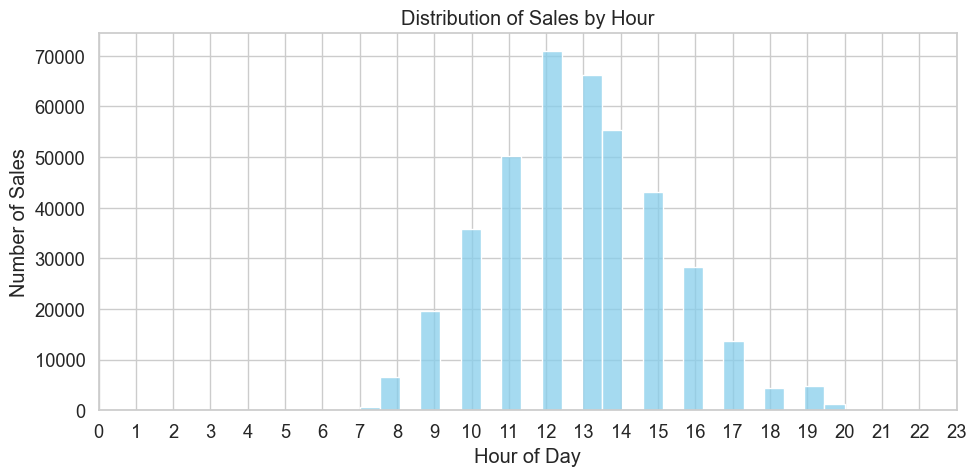

In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Hour'] = df['InvoiceDate'].dt.hour

plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=False, color='skyblue')
plt.title('Distribution of Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


### Top 10 Countries by Total Sales

C:\Users\Asus\AppData\Local\Temp\ipykernel_16448\3688135287.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




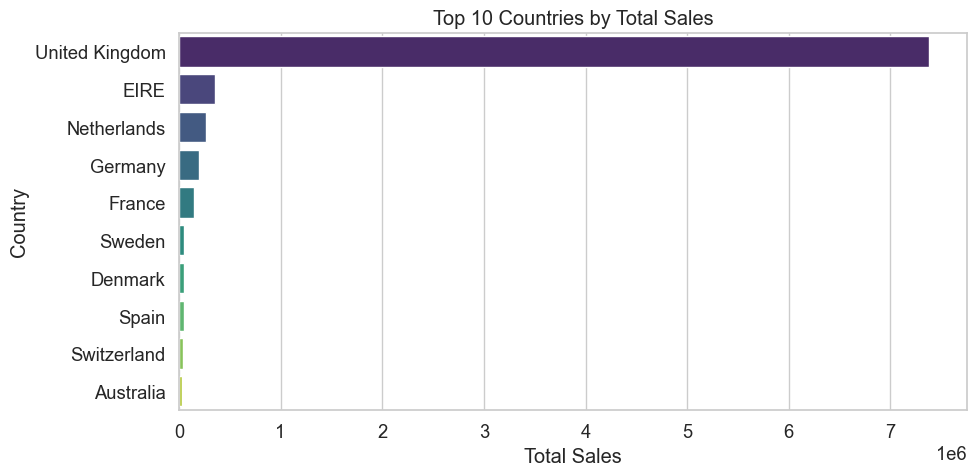

In [39]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show();


In [40]:

df_copy=df.copy()
df_copy.drop_duplicates(['InvoiceNumber'],inplace=True)
number_of_orders=len(df_copy)
number_of_orders

19213

In [41]:
import matplotlib.pyplot as plt
df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'])
df_copy['Day']=df_copy.InvoiceDate.dt.day_name()
df_copy
a=pd.DataFrame(df_copy.groupby(['Day']).Day.apply(lambda x:x.count()))
a
a=a.set_axis(['Fri','Mon','Sat','Sun','Thur','Tue','Wed'])
a=a.reindex(['Mon', 'Tue', 'Wed', 'Thur','Fri','Sat','Sun'])
a

,Day
Mon,2986
Tue,3514
Wed,3426
Thur,3976
Fri,2615
Sat,30
Sun,2666


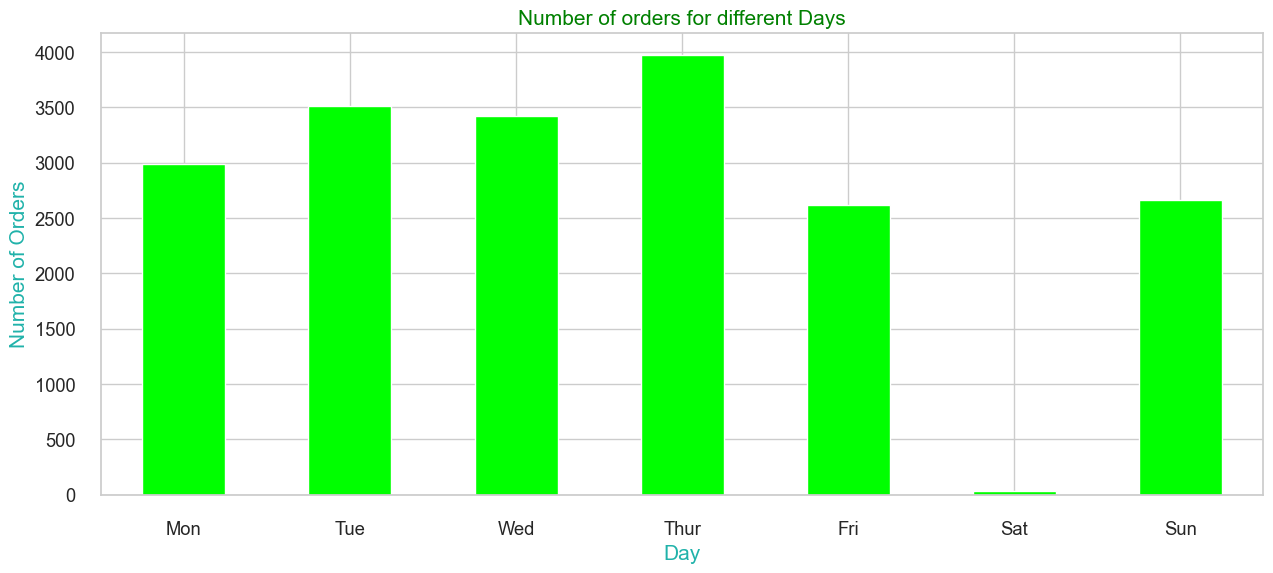

In [42]:

fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,6)

a['Day'].plot(kind='bar', color='lime',legend=False,axes=ax1).set_title( label ="Number of orders for different Days",color='green',fontsize=15)
ax1.set_xlabel('Day',color='lightseagreen',fontsize=15)
ax1.set_ylabel('Number of Orders',color='lightseagreen',fontsize=15)
ax1.tick_params(labelrotation = 0,size=15)

In [43]:
df_copy2=df.copy()
df_copy2['month_year'] = pd.to_datetime(df_copy2['InvoiceDate']).dt.strftime("%b_%Y")

df_copy2['TotalPrice']=df_copy2['Quantity']*df_copy2['UnitPrice']
df_copy2

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country,YearMonth,TotalSales,Hour,TotalPrice,month_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,83.40,7,83.40,Dec_2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00,7,81.00,Dec_2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,81.00,7,81.00,Dec_2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,100.80,7,100.80,Dec_2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,30.00,7,30.00,Dec_2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12,5.90,20,5.90,Dec_2010
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,3.75,20,3.75,Dec_2010
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,3.75,20,3.75,Dec_2010
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12,7.50,20,7.50,Dec_2010


### Number of orders for different Months

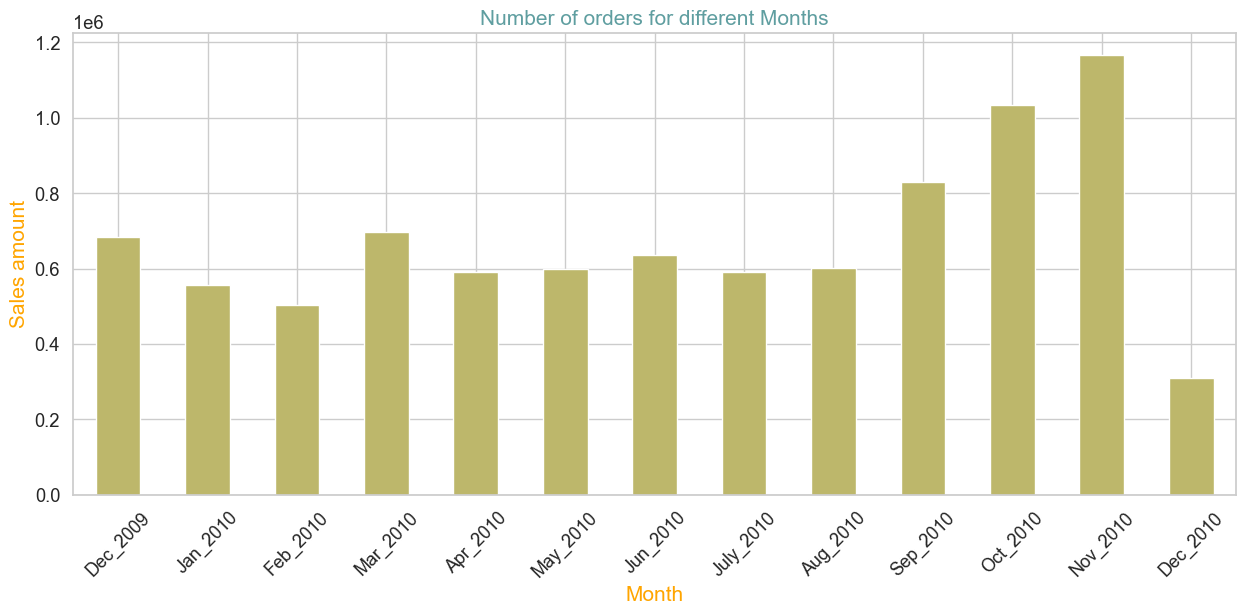

In [44]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(15,6)
df_copy2.groupby(['month_year'],sort=False)['TotalPrice'].apply(lambda x: x.sum()).plot(kind='bar',ax=ax2, color = 'darkkhaki').set_title('Number of orders for different Months',fontsize=15,color='cadetblue')
ax2.set_xlabel('Month',color='orange',fontsize=15)
ax2.set_ylabel('Sales amount',color='orange',fontsize=15)
ax2.set_xticklabels(['Dec_2009','Jan_2010','Feb_2010','Mar_2010','Apr_2010','May_2010','Jun_2010','July_2010','Aug_2010','Sep_2010','Oct_2010','Nov_2010','Dec_2010'],rotation=45,fontsize=13);

### Top 10 Frequent Baskets

C:\Users\Asus\AppData\Local\Temp\ipykernel_16448\2684242204.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




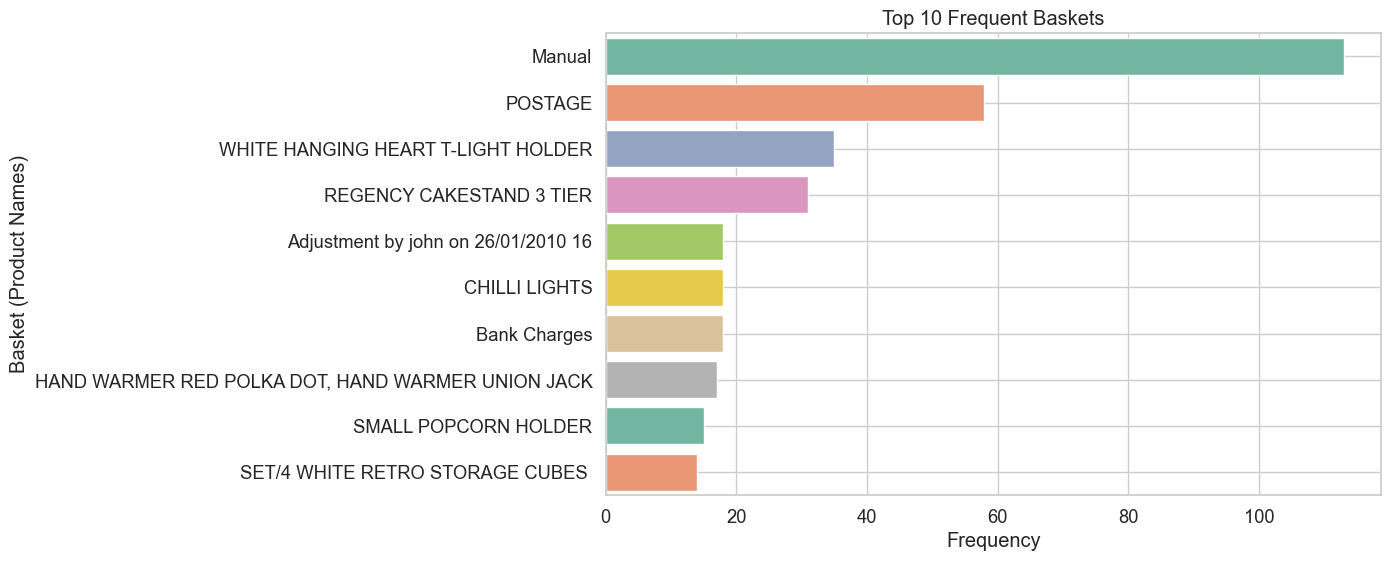

In [45]:
basket_counts = df.groupby(['InvoiceNumber'])['ProductName'].apply(lambda x: ', '.join(x)).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=basket_counts.values, y=basket_counts.index, palette='Set2')
plt.title('Top 10 Frequent Baskets')
plt.xlabel('Frequency')
plt.ylabel('Basket (Product Names)')
plt.grid(True)
plt.show();
